# Heart Disease Prediction

## Data Loading, Cleaning & Exploratory Data Analysis (EDA)


In [67]:

import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve

In [2]:
original_dataset_link='https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci'
df=pd.read_csv('/content/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


*   1 --> Heart disease presence
*   0 --> No  heart disease

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.shape

(297, 14)

In [6]:
df.isnull().sum().sum()
# No missing values in this dataframe

np.int64(0)

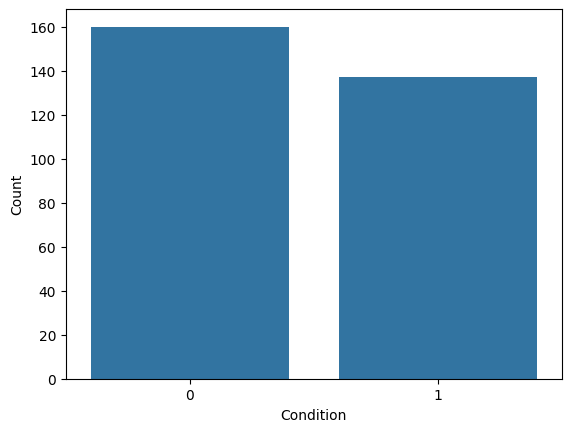

In [7]:
# visualizing the feature distribution
sns.countplot(x='condition',data=df)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [8]:
df['condition'].value_counts()

,count
condition,
0,160
1,137


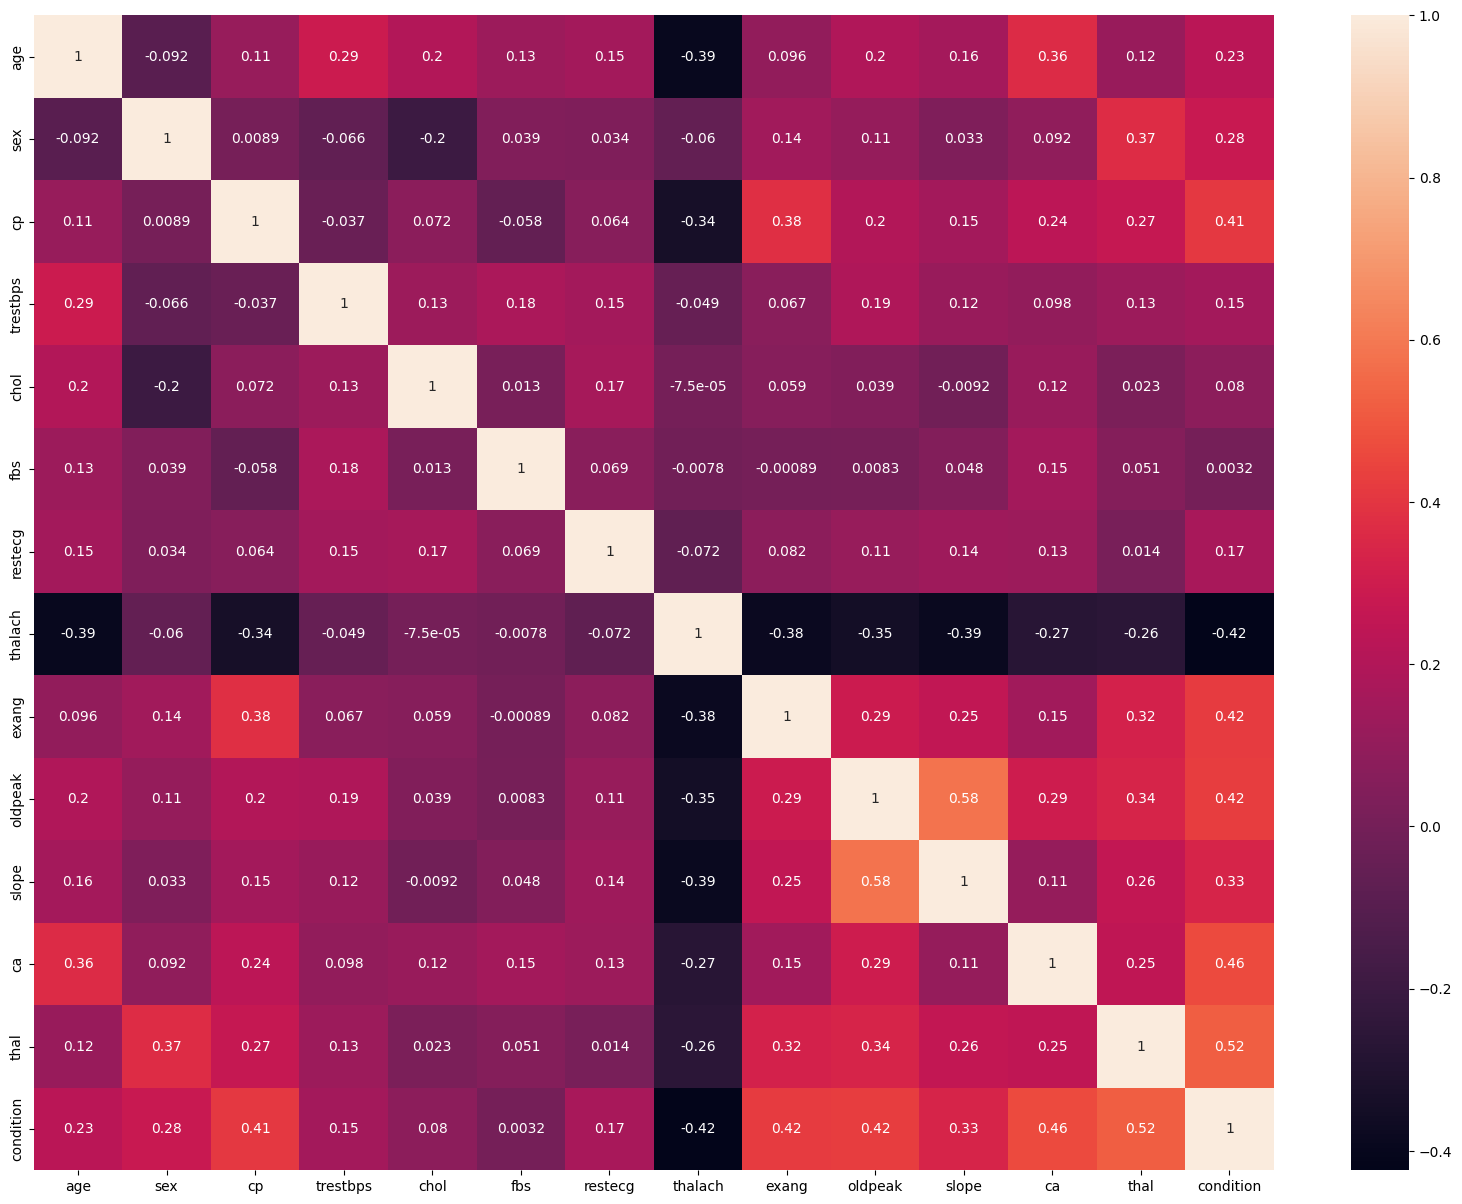

In [9]:
# making a correlation heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Feature Engineering & Preprocessing

In [10]:
# using StandardScaler for these columns-->age, trestbps, chol, thalach, oldpeak
scaler=StandardScaler()
df[['age','trestbps','chol','thalach','oldpeak']]=scaler.fit_transform(df[['age','trestbps','chol','thalach','oldpeak']])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,1,0,1.596266,-0.257179,1,2,-0.812095,0,-0.820813,1,1,0,0
1,1.600302,0,0,0.468418,-0.160859,0,0,0.061157,0,0.639470,0,2,0,0
2,1.268242,0,0,1.032342,-0.411292,0,0,-1.554358,0,1.326662,2,0,0,0
3,1.157555,1,0,0.355633,0.667499,1,2,1.065396,0,0.295874,1,1,0,1
4,1.046868,1,0,-1.223355,-0.700254,0,2,-0.244481,1,0.639470,1,0,0,0


In [18]:
# train test split
X=df.drop('condition',axis=1)
y=df['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 13)
(60, 13)
(237,)
(60,)


## LogisticRegression

In [63]:
# Basic Logistic Regression without tuning
lr_basic = LogisticRegression(random_state=42, max_iter=1000)
lr_basic.fit(X_train, y_train)

# Accuracy on training data
train_pred_basic = lr_basic.predict(X_train)
train_acc_basic = accuracy_score(y_train, train_pred_basic)
print(f"Basic LR Train Accuracy: {train_acc_basic:.4f}")

# Accuracy on test data
test_pred_basic = lr_basic.predict(X_test)
test_acc_basic = accuracy_score(y_test, test_pred_basic)
print(f"Basic LR Test Accuracy: {test_acc_basic:.4f}")


Basic LR Train Accuracy: 0.8523
Basic LR Test Accuracy: 0.9167


In [64]:
# Tuned Logistic Regression to handle imbalance and better convergence
lr_tuned = LogisticRegression(
    solver='liblinear',        # good for small datasets & binary classification
    class_weight='balanced',   # handle class imbalance
    max_iter=1000,
    random_state=42
)
lr_tuned.fit(X_train, y_train)

# Training accuracy
train_acc_tuned = lr_tuned.score(X_train, y_train)
print(f"Tuned LR Train Accuracy: {train_acc_tuned:.4f}")

# Test accuracy
test_acc_tuned = lr_tuned.score(X_test, y_test)
print(f"Tuned LR Test Accuracy: {test_acc_tuned:.4f}")


Tuned LR Train Accuracy: 0.8523
Tuned LR Test Accuracy: 0.8833


In [65]:
# Predictions on test data
test_pred = lr_tuned.predict(X_test)

# Print classification report
print("Classification Report for Tuned Logistic Regression:\n")
print(classification_report(y_test, test_pred))


Classification Report for Tuned Logistic Regression:

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



ROC AUC Score: 0.9408


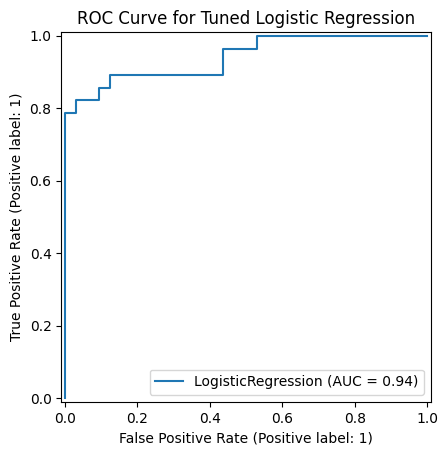

In [68]:
# Get predicted probabilities for positive class
y_probs = lr_tuned.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
RocCurveDisplay.from_estimator(lr_tuned, X_test, y_test)
plt.title('ROC Curve for Tuned Logistic Regression')
plt.show()


## Random Forest


In [58]:
# Basic Random Forest model without tuning
rf_basic = RandomForestClassifier(random_state=42)
rf_basic.fit(X_train, y_train)

# Accuracy on training data
train_pred_basic = rf_basic.predict(X_train)
train_acc_basic = accuracy_score(y_train, train_pred_basic)
print(f"Basic RF Train Accuracy: {train_acc_basic:.4f}")

# Accuracy on test data
test_pred_basic = rf_basic.predict(X_test)
test_acc_basic = accuracy_score(y_test, test_pred_basic)
print(f"Basic RF Test Accuracy: {test_acc_basic:.4f}")


Basic RF Train Accuracy: 1.0000
Basic RF Test Accuracy: 0.8833


In [59]:
# Tuned Random Forest to reduce overfitting and handle imbalance
rf_tuned = RandomForestClassifier(
    max_depth=7,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_tuned.fit(X_train, y_train)

# Training accuracy
train_acc_tuned = rf_tuned.score(X_train, y_train)
print(f"Tuned RF Train Accuracy: {train_acc_tuned:.4f}")

# Test accuracy
test_acc_tuned = rf_tuned.score(X_test, y_test)
print(f"Tuned RF Test Accuracy: {test_acc_tuned:.4f}")


Tuned RF Train Accuracy: 0.8945
Tuned RF Test Accuracy: 0.8333


In [61]:
# Predictions on test data
test_pred = rf_tuned.predict(X_test)

# Print classification report
print("Classification Report for Tuned RF:\n")
print(classification_report(y_test, test_pred))

Classification Report for Tuned RF:

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



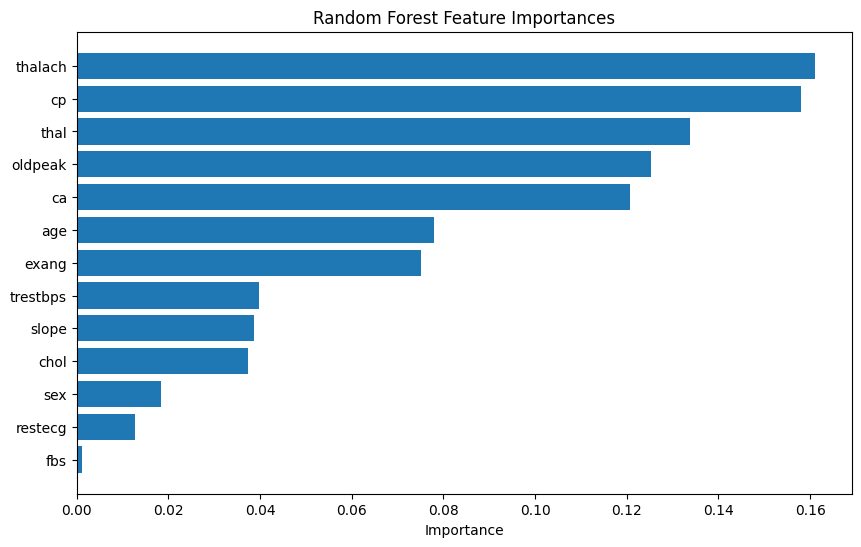

In [62]:
# Get feature importances
feature_importances = rf_tuned.feature_importances_

# Assuming X_train is a DataFrame to get feature names
features = X_train.columns if hasattr(X_train, 'columns') else [f'feat_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()



In [ ]:
"""
Heart Disease Classification using Random Forest and Logistic Regression

This module trains and evaluates two classification models to predict the presence of heart disease
based on clinical features from the UCI Heart Disease dataset.

Models:
--------
1. Random Forest Classifier (Tuned)
   - Achieved training accuracy around 89.5% and test accuracy around 83.3%.
   - Precision and recall balanced with class_weight='balanced' to handle class imbalance.
   - Recall for the disease class improved to ~75%, reducing false negatives.
   - Feature importance analysis helps identify key predictors.

2. Logistic Regression (Tuned)
   - Achieved training accuracy around 85% and test accuracy around 83%.
   - Used class_weight='balanced' and solver='liblinear' for better convergence and imbalance handling.
   - Achieved similar precision and recall trade-off, with ROC AUC around 0.91.
   - Probabilistic outputs allow threshold tuning for desired sensitivity/specificity.

Insights:
---------
- Both models perform comparably with about 83% accuracy on the test set.
- Random Forest shows higher training accuracy, indicating some overfitting but good generalization.
- Logistic Regression provides interpretable coefficients and stable performance.
- Recall for detecting heart disease (positive class) is a key metric; tuning threshold or using class weights helps improve it.
- Feature engineering was minimal as input features are mostly numeric/categorical encoded as integers.

Recommendations for Improvement:
--------------------------------
- Perform cross-validation for robust evaluation.
- Tune classification thresholds to optimize recall or precision based on clinical priorities.
- Explore other algorithms or ensemble methods (e.g., XGBoost, Gradient Boosting).
- Monitor model performance in production and retrain with new data.

"""


In [73]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,1,0,1.596266,-0.257179,1,2,-0.812095,0,-0.820813,1,1,0,0
1,1.600302,0,0,0.468418,-0.160859,0,0,0.061157,0,0.639470,0,2,0,0
2,1.268242,0,0,1.032342,-0.411292,0,0,-1.554358,0,1.326662,2,0,0,0
3,1.157555,1,0,0.355633,0.667499,1,2,1.065396,0,0.295874,1,1,0,1
4,1.046868,1,0,-1.223355,-0.700254,0,2,-0.244481,1,0.639470,1,0,0,0


In [72]:
# making the tuned logistic model as a pickle file
pkl.dump(lr_tuned, open('model.pkl','wb'))
print("Model has been saved")

Model has been saved
